In [544]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

path = 'C:\\Users\\WIN10\\Desktop\\train.txt'

In [368]:
dataSet = pd.read_table(path,header = None,sep=":")
dataSet.head()

,0,1,2,3
0,155.0,51.0,38.0,w
1,179.0,50.0,44.0,m
2,165.0,51.0,38.0,w
3,168.0,52.0,38.0,w
4,163.0,67.0,38.0,w


In [369]:
def word2num(yMat):
    inMat = yMat.copy()
    for i in range(yMat.shape[0]):
        for j in range(yMat.shape[1]):
            if yMat.iloc[i,j] == 'w':
                inMat.iloc[i,j] = 1
            if yMat.iloc[i,j] == 'm':
                inMat.iloc[i,j] = 0
    return inMat
            

In [442]:
def regularized(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis = 0)
    inStd = np.std(inMat.astype(float),axis = 0)
    inMat = (inMat - inMeans)/inStd
    return inMat

In [443]:
def BGD_LR(dataSet,alpha = 0.001,maxCycle = 500):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    xMat = regularized(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(maxCycle):
        grad = xMat.T * (xMat * weights - yMat)/m
        weights = weights - alpha*grad
    return weights

In [681]:
def SGD_LR(dataSet,alpha=0.001,maxCycle=500):
    dataSet = dataSet.sample(maxCycle, replace=True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    xMat = regularized(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (xMat[i] * weights - yMat[i])/m
        weights = weights - alpha*grad
    return weights

In [444]:
def Sigmoid(inX):
    s = 1/(1 + np.exp(-inX.astype(float)))
    return s

In [445]:
def logisticAcc(dataSet, method, alpha=0.01, maxCycle=500):
    weights = method(dataSet,alpha=alpha,maxCycle=maxCycle)
    weights = np.array(weights)
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    xMat = regularized(xMat)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    p = Sigmoid(xMat*weights).A.flatten()
    for i, j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    train_error = (np.fabs(yMat.A.flatten().astype(float) - p)).sum()
    trainAcc = 1 - train_error / yMat.shape[0]
    return p,trainAcc,weights

In [449]:
def logisticPredict(dataSet,weights):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    xMat = regularized(xMat)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    p = Sigmoid(xMat*weights).A.flatten()
    for i, j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    test_error = (np.fabs(yMat.A.flatten().astype(float) - p)).sum()
    testAcc = 1 - test_error / yMat.shape[0]
    return p,testAcc

In [458]:
'''
function：绘制ROC曲线
param:
      dataSet:测试数据集
      predic:正例（女）的预测概率
'''
def ROC(dataSet,predic):
    actual = np.array(dataSet.iloc[:,-1])
    predictions = predic
    #得到ROC曲线和曲线下AUC面积
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #画出ROC曲线
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate,lw=1,label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.ylabel('True Positive Rate')
    plt.show()

In [677]:
def decision(test,weights):
    inMeans = np.mean(test,axis = 0)
    inStd = np.std(test.astype(float),axis = 0)
    b_hleft = 100
    b_hright = 200
    b_wleft = 20
    b_wright = 100
    g_wleft = 20
    g_wright = 100
    g_fleft = 30
    g_fright = 50
    b1 = np.linspace(b_hleft, b_hright, 80)
    b2 = np.linspace(b_wleft, b_wright, 80)
    g1 = np.linspace(g_wleft, g_wright, 80)
    g2 = np.linspace(g_fleft, g_fright, 80)
    x1, y1 = np.meshgrid(b1, b2)
    x2, y2 = np.meshgrid(g1, g2)
    #画出决策线
    Colors=[]
    #不同性别用不同颜色区分（男：蓝，女：橘）
    for i in range(test.shape[0]):
        m=test.iloc[i,-1]
        if m == 0:
            Colors.append('blue')
        if m== 1:
            Colors.append('orange')
    cmap_light =ListedColormap(['#AAAAFF','#F0E68C'])
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,2,1)
    z1 = []
    for i in range(len(b1)):
        for j in range(len(b2)):
            data=np.mat([(x1[i][j]-inMeans[0])/inStd[0],(y1[i][j]-inMeans[1])/inStd[1]])
            p=Sigmoid(data*weights[0:2])
            if p > 0.5:
                z1.append(1)
            else:
                z1.append(0)
    z1 = np.reshape(z1,(len(b1),len(b2)))
    ax.contourf(x1,y1,z1,cmap=cmap_light)
    x = test.iloc[:, 0].tolist()
    y = test.iloc[:, 1].tolist()
    ax.scatter(x,y,c=Colors)
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    
    ax2 = fig.add_subplot(1,2,2)
    z2 = []
    for i in range(len(g1)):
        for j in range(len(g2)):
            data=np.mat([(x2[i][j]-inMeans[1])/inStd[1],(y2[i][j]-inMeans[2])/inStd[2]])
            p=Sigmoid(data*weights[1:3])
            if p > 0.5:
                z2.append(1)
            else:
                z2.append(0)
    z2 = np.reshape(z2,(len(g1),len(g2)))
    ax2.contourf(x2,y2,z2,cmap=cmap_light)
    x = test.iloc[:, 1].tolist()
    y = test.iloc[:, 2].tolist()
    ax2.scatter(x,y,c=Colors)
    ax2.set_xlabel('weight')
    ax2.set_ylabel('footsize')
    plt.show()

ten-fold cross-valid BDG:0.93
ten-fold cross-valid SGD:0.93


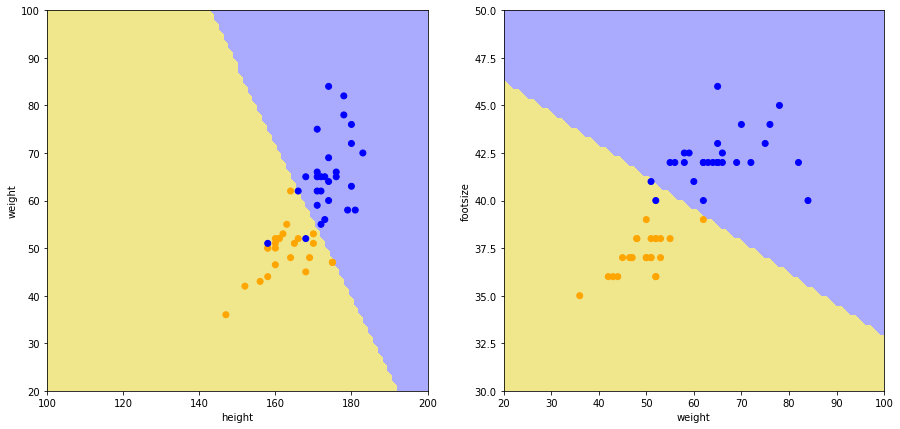

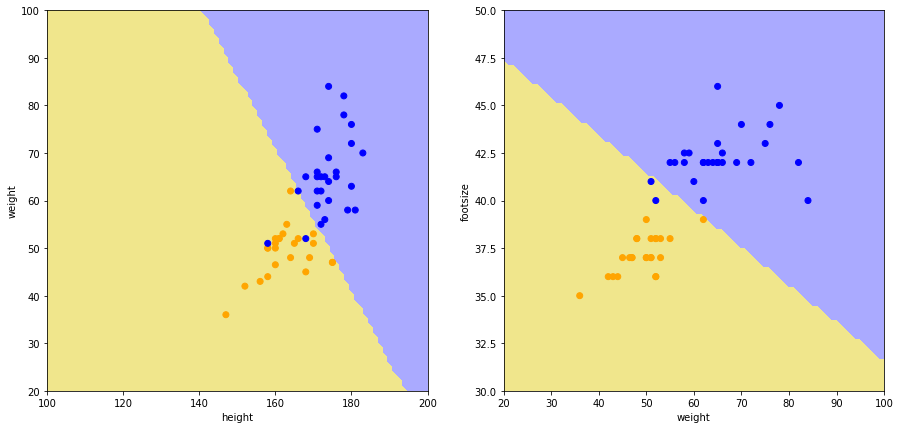

In [685]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

dataSet = word2num(dataSet)
x = np.array(dataSet.iloc[:,:-1])
y = np.array(dataSet.iloc[:,-1])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
train=np.mat(np.hstack((x_train,y_train.reshape((-1,1)))))
test=np.mat(np.hstack((x_test,y_test.reshape((-1,1)))))
kf = KFold(n_splits=10)
corr_BGD = 0
corr_SGD = 0
for train_index,test_index in kf.split(x):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]
    train=np.mat(np.hstack((x_train,y_train.reshape((-1,1)))))
    test=np.mat(np.hstack((x_test,y_test.reshape((-1,1)))))
    train=pd.DataFrame(train)
    test=pd.DataFrame(test)
    p_train_BGD,trainAcc_BGD,weights_BGD = logisticAcc(train, BGD_LR, alpha=0.001, maxCycle=500)
    p_test_BGD,testAcc_BGD = logisticPredict(test,weights)
    p_train_SGD,trainAcc_SGD,weights_SGD = logisticAcc(train, SGD_LR, alpha=0.001, maxCycle=500)
    p_test_SGD,testAcc_SGD = logisticPredict(test,weights)
    corr_BGD += testAcc_BGD
    corr_SGD += testAcc_SGD
print("ten-fold cross-valid BDG:{:.2f}".format(corr_BGD/10))
print("ten-fold cross-valid SGD:{:.2f}".format(corr_SGD/10))
test_BGD = pd.DataFrame(test)
decision(test_BGD,weights_BGD)
test_SGD = pd.DataFrame(test)
decision(test_SGD,weights_SGD)

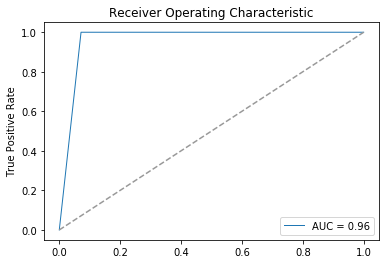

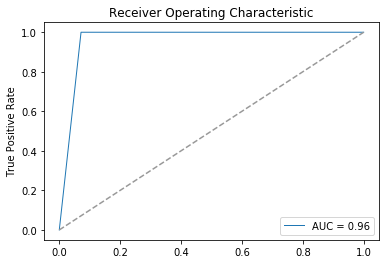

In [686]:
ROC(test_BGD,p_test_BGD)
ROC(test_SGD,p_test_SGD)